In [2]:
# The purpose of this notebook is to compare the result of GWAS 1 using single DNase tracks versus the entire set.
# Each set of results using a single track identifies SNPs using threshold SD = 1.0 for that track 

import os 
import pandas as pd 

single_track_data_path = './gwas_1_leading_SNPs_by_track_random/sd=1.0'

files = [f for f in os.listdir(single_track_data_path) if os.path.isfile(os.path.join(single_track_data_path, f))]

for file in files:
    print(file)

filtered_snps_gwas_1_track=SAD401_sd=1.0_overlap_df.csv
filtered_snps_gwas_1_track=SAD253_sd=1.0_overlap_df.csv
filtered_snps_gwas_1_track=SAD415_sd=1.0.csv
filtered_snps_gwas_1_track=SAD270_sd=1.0_overlap_df.csv
filtered_snps_gwas_1_track=SAD537_sd=1.0.csv
filtered_snps_gwas_1_track=SAD220_sd=1.0_overlap_df.csv
filtered_snps_gwas_1_track=SAD633_sd=1.0.csv
filtered_snps_gwas_1_track=SAD109_sd=1.0_overlap_df.csv
filtered_snps_gwas_1_track=SAD461_sd=1.0_overlap_df.csv
filtered_snps_gwas_1_track=SAD109_sd=1.0.csv
filtered_snps_gwas_1_track=SAD401_sd=1.0.csv
filtered_snps_gwas_1_track=SAD660_sd=1.0_overlap_df.csv
filtered_snps_gwas_1_track=SAD431_sd=1.0.csv
filtered_snps_gwas_1_track=SAD222_sd=1.0.csv
filtered_snps_gwas_1_track=SAD400_sd=1.0_overlap_df.csv
filtered_snps_gwas_1_track=SAD461_sd=1.0.csv
filtered_snps_gwas_1_track=SAD661_sd=1.0_overlap_df.csv
filtered_snps_gwas_1_track=SAD404_sd=1.0.csv
filtered_snps_gwas_1_track=SAD288_sd=1.0.csv
filtered_snps_gwas_1_track=SAD152_sd=1.0_overl

In [3]:
track_labels = "../target_dnase_ataq_tracks_labelled.csv"
track_labels_df = pd.read_csv(track_labels)
track_labels_df['track_col'] = 'SAD' + track_labels_df.index.astype(str)
track_labels_df = track_labels_df[['track_col', 'target_labels', 'tissue']]

Comparison of results from single tracks compared to all tracks

In [4]:
overlap_dfs = [file for file in files if file.endswith('overlap_df.csv')]

overlap_df_list = []
for file in overlap_dfs:
    df = pd.read_csv(os.path.join(single_track_data_path, file))
    overlap_df_list.append(df)

full_overlap_dfs = pd.concat(overlap_df_list, ignore_index=True).reset_index(drop=True)

full_overlap_dfs = pd.merge(full_overlap_dfs, track_labels_df, on='track_col', how='inner')

full_overlap_dfs = full_overlap_dfs._append({'track_col': 'ALL', 'matching_snps': 15 , 'matching_loci': 28 , 'new_coding_snps': 3, 'target_labels': 'all', 'tissue': 'random'}, ignore_index=True).sort_values(by=['matching_loci', 'matching_snps'], ascending=False)


full_overlap_dfs

,track_col,matching_snps,matching_loci,new_coding_snps,target_labels,tissue
33,ALL,15,28,3,all,random
26,SAD236,8,28,6,DNASE:omental fat pad female adult (53 years),adipose tissue
6,SAD660,7,28,6,DNASE:H9 G1 phase genetically modified using s...,H9 embryonic cell line
20,SAD526,4,25,10,DNASE:mesendoderm originated from H1-hESC,stem cell
5,SAD461,5,24,8,DNASE:lung embryo (80 days) and male embryo (7...,lung embryo
11,SAD139,5,24,8,DNASE:NT2/D1,embryonal carcinoma
16,SAD603,5,24,8,DNASE:right lung female embryo (107 days),lung embryo
18,SAD537,5,24,6,DNASE:L1-S8R,fibroblast
22,SAD297,5,24,6,DNASE:right renal cortex interstitium male emb...,renal
24,SAD222,5,24,9,DNASE:renal cortex interstitium male embryo (1...,renal


In [5]:
full_overlap_dfs['matching_loci'].mean()

21.970588235294116

Important Note: Adipose tissue performed equally as well as frontal cortex tissue. However, overall, the mean number of loci recovered was lower (21.97 vs. 24.67).

Comparison of coding snps identified between experiments

In [6]:
coding_snps_list = "../gwas_3_scz_intermediate_files/coding_snps.csv"
coding_snps_list = pd.read_csv(coding_snps_list)
coding_snps_list = coding_snps_list[['chr', 'pos', 'snp']]

In [7]:
gwas_1_single_track_results = [file for file in files if file.endswith('sd=1.0.csv')]

gwas_1_all_track_results = pd.read_csv('../filtered_snps_gwas_1/filtered_snps_gwas_1_threshold=1.0.csv')

gwas_1_all_track_results

,SAD411,alt,chr,pos,ref,snp,chromosome,base_pair_location,p_value,in_coding_region
0,6.800000e-06,T,1.0,37670102.0,C,rs215807,1.0,37670102.0,1.806570e-12,False
1,2.270000e-04,A,1.0,72752073.0,G,rs12740789,1.0,72752073.0,6.139798e-09,False
2,2.754000e-05,A,1.0,75297145.0,C,rs277352,1.0,75297145.0,7.537886e-08,False
3,-6.640000e-05,T,1.0,190590155.0,A,rs12123548,1.0,190590155.0,9.271970e-08,False
4,3.990000e-05,C,2.0,212687961.0,G,rs1439246,2.0,212687961.0,3.958796e-10,False
5,4.610000e-05,G,2.0,15447050.0,C,rs1808361,2.0,15447050.0,2.674179e-08,False
6,-4.363000e-05,T,2.0,176717741.0,C,rs9287989,2.0,176717741.0,8.500583e-08,False
7,8.100000e-06,C,3.0,49213637.0,T,rs9586,3.0,49213637.0,5.063395e-08,True
8,8.170000e-06,A,5.0,103954801.0,T,rs173823,5.0,103954801.0,2.756487e-10,False
9,2.327000e-04,A,5.0,61519672.0,C,rs28524171,5.0,61519672.0,4.263551e-08,False


In [8]:
all_track_df_coding = gwas_1_all_track_results[gwas_1_all_track_results['snp'].isin(list(coding_snps_list['snp']))]
print(all_track_df_coding)

      SAD411 alt   chr         pos ref        snp  chromosome  \
7   0.000008   C   3.0  49213637.0   T     rs9586         3.0   
11  0.000006   A   6.0  30611350.0   C  rs9262132         6.0   
37 -0.000027   A  20.0  44688665.0   G     rs9074        20.0   

    base_pair_location       p_value  in_coding_region  
7           49213637.0  5.063395e-08              True  
11          30611350.0  5.428435e-12              True  
37          44688665.0  7.804943e-08              True  


In [9]:
coding_snps_ref = {'rs9074', 'rs9262132', 'rs9586'}

In [10]:
coding_snps_comparison_df = pd.DataFrame(columns = ['track_col', 'track_coding_snps', 'coding_snps', 'intersection_with_all_track_coding_snps', 'number_of_unique_snps', 'unique_coding_snps'])

for file in gwas_1_single_track_results:
    single_track_df = pd.read_csv(os.path.join(single_track_data_path, file))
    single_track_df_coding = single_track_df[single_track_df['snp'].isin(list(coding_snps_list['snp']))]
    track_col = [col for col in single_track_df.columns if col.startswith('SAD')][0] 
    coding_snps =  set(single_track_df_coding['snp'])
    track_coding_snps = len(single_track_df_coding)
    inter = len(list(coding_snps.intersection(coding_snps_ref)))
    unique_coding_snps = set(single_track_df_coding['snp']) - coding_snps_ref
    coding_snps_comparison_df = coding_snps_comparison_df._append({'track_col': track_col, 'track_coding_snps':track_coding_snps, 'coding_snps':coding_snps, 'intersection_with_all_track_coding_snps':inter, 'number_of_unique_snps': len(unique_coding_snps),'unique_coding_snps':unique_coding_snps}, ignore_index=True)

coding_snps_comparison_df = coding_snps_comparison_df.sort_values(by = 'track_coding_snps', ascending=False)
coding_snps_comparison_df

,track_col,track_coding_snps,coding_snps,intersection_with_all_track_coding_snps,number_of_unique_snps,unique_coding_snps
31,SAD52,14,"{rs9074, rs1950835, rs7805419, rs45527431, rs2...",3,11,"{rs1950835, rs7805419, rs45527431, rs2267633, ..."
3,SAD109,12,"{rs9074, rs1261084, rs1950835, rs45527431, rs2...",3,9,"{rs1261084, rs1950835, rs45527431, rs2267633, ..."
11,SAD220,12,"{rs9074, rs1261084, rs45527431, rs2267633, rs6...",3,9,"{rs1261084, rs45527431, rs2267633, rs62538199,..."
21,SAD152,12,"{rs9074, rs1261084, rs1950835, rs45527431, rs2...",3,9,"{rs1261084, rs1950835, rs45527431, rs2267633, ..."
4,SAD401,11,"{rs9074, rs1261084, rs45527431, rs2267633, rs6...",3,8,"{rs1261084, rs45527431, rs2267633, rs62538199,..."
23,SAD321,11,"{rs9074, rs1261084, rs200981, rs45527431, rs22...",3,8,"{rs1261084, rs200981, rs45527431, rs2267633, r..."
0,SAD415,10,"{rs9074, rs1261084, rs200981, rs45527431, rs22...",3,7,"{rs1261084, rs200981, rs45527431, rs2267633, r..."
2,SAD633,10,"{rs9074, rs45527431, rs2267633, rs116827595, r...",3,7,"{rs45527431, rs2267633, rs116827595, rs1142944..."
30,SAD526,10,"{rs9074, rs1261084, rs7805419, rs45527431, rs2...",3,7,"{rs1261084, rs7805419, rs45527431, rs2267633, ..."
24,SAD654,10,"{rs9074, rs1261084, rs1950835, rs45527431, rs2...",3,7,"{rs1261084, rs1950835, rs45527431, rs2267633, ..."


In [11]:
all_coding_snps_set = set()

for snp_set in coding_snps_comparison_df['coding_snps']:
    all_coding_snps_set = all_coding_snps_set.union(set(snp_set))

print(len(all_coding_snps_set))
print(all_coding_snps_set)


17
{'rs1950835', 'rs7805419', 'rs45527431', 'rs200981', 'rs116827595', 'rs114294403', 'rs2302777', 'rs240780', 'rs9074', 'rs1261084', 'rs2267633', 'rs62538199', 'rs9262132', 'rs708228', 'rs574526128', 'rs11646401', 'rs9586'}


Just 17 different coding snps were identified across all analyses

Comparison of SNPs across tracks 

In [12]:
# SNPS from original study are the same as filtered_snps_gwas_1_threshold=0.0.csv

original_snps_path = '../filtered_snps_gwas_1/filtered_snps_gwas_1_threshold=0.0.csv'
original_snps = pd.read_csv(original_snps_path)
original_snps_list = list(original_snps['snp'])
original_snps['left_border'] = original_snps['pos'] - 1000000
original_snps['right_border'] = original_snps['pos'] + 1000000
print(original_snps.head())


     SAD411 alt  chr          pos ref          snp  chromosome  \
0 -0.000006   G  1.0   37678598.0   A     rs215852         1.0   
1  0.000058   A  1.0   72940273.0   G   rs10789340         1.0   
2  0.000006   C  1.0   75417146.0   G  rs111333124         1.0   
3  0.000006   C  2.0  212676884.0   T  rs138218528         2.0   
4  0.000018   C  2.0   15462058.0   T   rs75329615         2.0   

   base_pair_location       p_value  in_coding_region  left_border  \
0          37678598.0  3.224842e-13             False   36678598.0   
1          72940273.0  8.859282e-10             False   71940273.0   
2          75417146.0  5.284665e-09             False   74417146.0   
3         212676884.0  1.399138e-10             False  211676884.0   
4          15462058.0  3.340240e-09             False   14462058.0   

   right_border  
0    38678598.0  
1    73940273.0  
2    76417146.0  
3   213676884.0  
4    16462058.0  


In [13]:
reference_loci = original_snps[['snp', 'chr', 'left_border', 'right_border']]

def compute_non_overlapping_loci(single_track_df):
    overlap_loci = pd.DataFrame(columns=['snp', 'chr', 'left_border', 'right_border'])
    missing_loci = pd.DataFrame(columns=['snp', 'chr', 'left_border', 'right_border'])
    
    single_track_df = single_track_df[['snp', 'chr', 'left_border', 'right_border']]
    
    for i, row1 in single_track_df.iterrows():
        left1, right1 = row1['left_border'], row1['right_border']
        chr1 = row1['chr']
        
        for j, row2 in reference_loci.iterrows():
            left2, right2 = row2['left_border'], row2['right_border']
            chr2 = row2['chr']
            
            if (left1 <= right2 and right1 >= left2) and (chr1 == chr2):
                overlap_loci = pd.concat([overlap_loci, pd.DataFrame([row2])], ignore_index=True)
                break
    
    missing_loci = reference_loci[~(reference_loci['snp'].isin(overlap_loci['snp']))]

    return overlap_loci, missing_loci


In [14]:
non_coding_all_tracks =  gwas_1_all_track_results[~(gwas_1_all_track_results['snp'].isin(list(coding_snps_list['snp'])))]

non_coding_comparison = pd.DataFrame(columns = ['track_col', 'num_snps_total', 'num_non_coding', 'num_coding',  "num_non_coding_intersect", "non_coding_intersect_with_all_tracks", "num_non_coding_intersect_original" , "non_coding_intersect_with_original", 'num_overlap_loci' , 'overlap_loci', 'num_missing_loci', 'missing_loci' ])
for file in gwas_1_single_track_results:
    single_track_df = pd.read_csv(os.path.join(single_track_data_path, file))
    #print(single_track_df.head())
    total_found = len(single_track_df)
    single_track_df_coding = single_track_df[single_track_df['snp'].isin(list(coding_snps_list['snp']))]
    single_track_df_non_coding= single_track_df[~(single_track_df['snp'].isin(list(coding_snps_list['snp'])))]
    track_col = [col for col in single_track_df.columns if col.startswith('SAD')][0] 

    num_non_coding = len(single_track_df_non_coding)
    num_coding = len(single_track_df_coding)
    non_coding_intersect = set(single_track_df_non_coding['snp']).intersection(set(non_coding_all_tracks['snp']))
    num_non_coding_intersect = len(non_coding_intersect)
    non_coding_intersect_original_study = set(single_track_df_non_coding['snp']).intersection(set(original_snps_list))
    num_non_coding_intersect_original = len(non_coding_intersect_original_study)

    overlap_loci_df, missing_loci_df = compute_non_overlapping_loci(single_track_df)
    overlap_loci = set(overlap_loci_df['snp'])
    missing_loci = set(missing_loci_df['snp'])
    num_missing_loci = len(missing_loci)
    num_overlap_loci = len(overlap_loci)
    non_coding_comparison = non_coding_comparison._append({'track_col': track_col, 'num_snps_total': total_found, 'num_non_coding': num_non_coding, 'num_coding': num_coding, "num_non_coding_intersect": num_non_coding_intersect, "non_coding_intersect_with_all_tracks": non_coding_intersect, "non_coding_intersect_with_original": non_coding_intersect_original_study, \
    'num_non_coding_intersect_original': num_non_coding_intersect_original,   'num_overlap_loci': num_overlap_loci, 'overlap_loci': overlap_loci, 'num_missing_loci': num_missing_loci, 'missing_loci':missing_loci }, ignore_index = True)
    
labels = pd.read_csv('./full_overlaps_df_labelled.csv')

print(labels.head())
labels = labels[['track_col', 'group']]
non_coding_comparison = non_coding_comparison.merge(labels, on='track_col', how='left')

non_coding_comparison




/tmp/ipykernel_3279/3818784960.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  overlap_loci = pd.concat([overlap_loci, pd.DataFrame([row2])], ignore_index=True)
/tmp/ipykernel_3279/3818784960.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  overlap_loci = pd.concat([overlap_loci, pd.DataFrame([row2])], ignore_index=True)
/tmp/ipykernel_3279/3818784960.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will 

   Unnamed: 0 track_col  matching_snps  matching_loci  new_coding_snps  \
0          17      SAD1              4             28                5   
1          33       ALL              6             27                3   
2           3      SAD9              3             27                5   
3           4    SAD355              7             26                6   
4           5    SAD602              5             26                6   

                                       target_labels tissue  \
0  DNASE:frontal cortex male adult (27 years) and...  brain   
1                                                all  brain   
2  DNASE:frontal cortex female adult (67 years) a...  brain   
3  DNASE:superior temporal gyrus male adult (84 y...  brain   
4         DNASE:occipital lobe male adult (84 years)  brain   

                    group  
0                  cortex  
1                     all  
2                  cortex  
3  adult_brain_non_cortex  
4  adult_brain_non_cortex  


/tmp/ipykernel_3279/3818784960.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  overlap_loci = pd.concat([overlap_loci, pd.DataFrame([row2])], ignore_index=True)


,track_col,num_snps_total,num_non_coding,num_coding,num_non_coding_intersect,non_coding_intersect_with_all_tracks,num_non_coding_intersect_original,non_coding_intersect_with_original,num_overlap_loci,overlap_loci,num_missing_loci,missing_loci,group
0,SAD415,41,31,10,9,"{rs1028750, rs12123548, rs3896224, rs1950834, ...",2,"{rs1950834, rs3896224}",22,"{rs4404022, rs10512249, rs3800847, rs537160, r...",7,"{rs9262120, rs215852, rs3863241, rs30266, rs71...",NaN
1,SAD537,44,38,6,8,"{rs1028750, rs200949, rs10512249, rs3896224, r...",5,"{rs200949, rs10512249, rs3896224, rs1950834, r...",23,"{rs30266, rs10512249, rs3800847, rs537160, rs4...",6,"{rs3863241, rs4801157, rs71367544, rs4404022, ...",NaN
2,SAD633,41,31,10,8,"{rs1028750, rs4936272, rs200949, rs1808361, rs...",4,"{rs10752206, rs1950834, rs4801157, rs200949}",22,"{rs30266, rs10512249, rs3800847, rs537160, rs4...",7,"{rs9262120, rs1504746, rs3863241, rs71367544, ...",NaN
3,SAD109,32,20,12,6,"{rs2399576, rs4936272, rs200949, rs17101957, r...",2,"{rs35538328, rs200949}",19,"{rs10512249, rs3800847, rs537160, rs4245154, r...",10,"{rs9262120, rs1504746, rs215852, rs3863241, rs...",NaN
4,SAD401,31,20,11,5,"{rs4936272, rs10512249, rs3091404, rs17101957,...",2,"{rs10512249, rs3872822}",18,"{rs35538328, rs215852, rs200949, rs12377572, r...",11,"{rs9262120, rs1504746, rs3863241, rs138218528,...",NaN
5,SAD431,30,21,9,4,"{rs4327001, rs10512249, rs200949, rs7502539}",4,"{rs10512249, rs200949, rs3872822, rs7502539}",17,"{rs35538328, rs215852, rs200949, rs4404022, rs...",12,"{rs9262120, rs1504746, rs3863241, rs138218528,...",NaN
6,SAD222,42,33,9,8,"{rs2399576, rs1028750, rs200949, rs10512249, r...",5,"{rs200949, rs10512249, rs1950834, rs3872822, r...",22,"{rs30266, rs10512249, rs3800847, rs537160, rs4...",7,"{rs9262120, rs3863241, rs4801157, rs71367544, ...",NaN
7,SAD461,36,28,8,10,"{rs2399576, rs1028750, rs200949, rs4936272, rs...",5,"{rs200949, rs10512249, rs10789340, rs1950834, ...",22,"{rs30266, rs10512249, rs3800847, rs537160, rs4...",7,"{rs9262120, rs4801157, rs138218528, rs71367544...",NaN
8,SAD404,40,32,8,5,"{rs1028750, rs200949, rs1950834, rs3807866, rs...",3,"{rs10752206, rs1950834, rs200949}",22,"{rs30266, rs10512249, rs3800847, rs537160, rs4...",7,"{rs9262120, rs1504746, rs3863241, rs71367544, ...",NaN
9,SAD288,32,22,10,5,"{rs4936272, rs200949, rs35893220, rs3807866, r...",1,{rs200949},17,"{rs35538328, rs1504746, rs138218528, rs200949,...",12,"{rs9262120, rs215852, rs3863241, rs30266, rs71...",NaN


In [15]:
def union_func(column):
    all_set = set()
    for snp_set in column:
        all_set = all_set.union(snp_set)
    print(len(all_set))
    print(all_set)


In [16]:
union_func(non_coding_comparison['missing_loci'])

20
{'rs215852', 'rs30266', 'rs71367544', 'rs4404022', 'rs537160', 'rs4245154', 'rs13174273', 'rs10752206', 'rs111333124', 'rs10818400', 'rs9262120', 'rs1504746', 'rs3863241', 'rs138218528', 'rs200949', 'rs3896224', 'rs75329615', 'rs10765821', 'rs3872822', 'rs4801157'}


In [17]:
union_func(non_coding_comparison['overlap_loci'])

29
{'rs30266', 'rs4404022', 'rs10512249', 'rs3800847', 'rs537160', 'rs4245154', 'rs13174273', 'rs7502539', 'rs111333124', 'rs10818400', 'rs1504746', 'rs3863241', 'rs138218528', 'rs200949', 'rs12377572', 'rs3896224', 'rs17508548', 'rs75329615', 'rs10765821', 'rs10789340', 'rs1950834', 'rs215852', 'rs71367544', 'rs10752206', 'rs35538328', 'rs9262120', 'rs2369818', 'rs3872822', 'rs4801157'}


In [18]:
correlation = non_coding_comparison['num_snps_total'].corr(non_coding_comparison['num_coding'])
print(f"Correlation coefficient between total snps and number of coding snps found: {correlation}\n")

correlation_non_coding = non_coding_comparison['num_snps_total'].corr(non_coding_comparison['num_non_coding'])
print(f"Correlation coefficient between total snps and number of non-coding snps found: {correlation_non_coding}")

Correlation coefficient between total snps and number of coding snps found: -0.6572367024801755

Correlation coefficient between total snps and number of non-coding snps found: 0.9743199867204696


Text(0, 0.5, 'num_coding_snps')

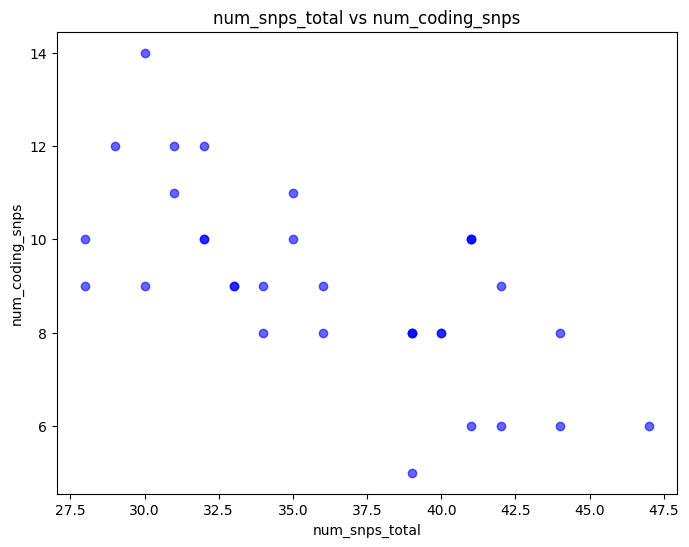

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


plt.figure(figsize=(8, 6))
plt.scatter(non_coding_comparison['num_snps_total'], non_coding_comparison['num_coding'], color='b', alpha=0.6)
plt.title('num_snps_total vs num_coding_snps')

plt.xlabel('num_snps_total')
plt.ylabel('num_coding_snps')



Text(0, 0.5, 'num_non_coding_snps')

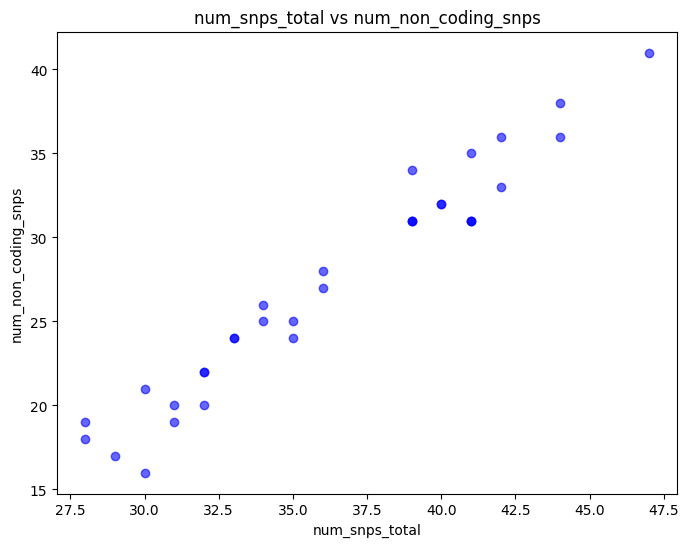

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(non_coding_comparison['num_snps_total'], non_coding_comparison['num_non_coding'], color='b', alpha=0.6)
plt.title('num_snps_total vs num_non_coding_snps')

plt.xlabel('num_snps_total')
plt.ylabel('num_non_coding_snps')
